In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import seaborn as sns

# Getting Data

In [50]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [26]:
# check dataset for missing values
print("Missing values: ", wine.isnull().values.any())

Missing values:  False


# Classifying Quality

In [27]:
quality = wine["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Mid")

In [29]:
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([wine,category],axis=1)
data.drop(columns="quality",axis=1,inplace=True)

In [30]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Mid
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Mid
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Mid
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Mid
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Mid


# Data Analysis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Mid     1319
Good     217
Bad       63
Name: category, dtype: int64

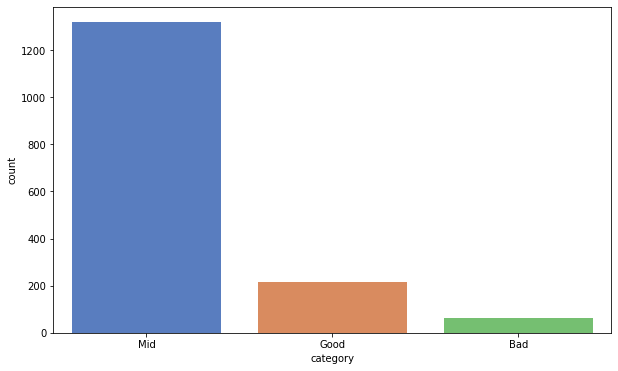

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(data["category"],palette="muted")
data["category"].value_counts()

<AxesSubplot:>

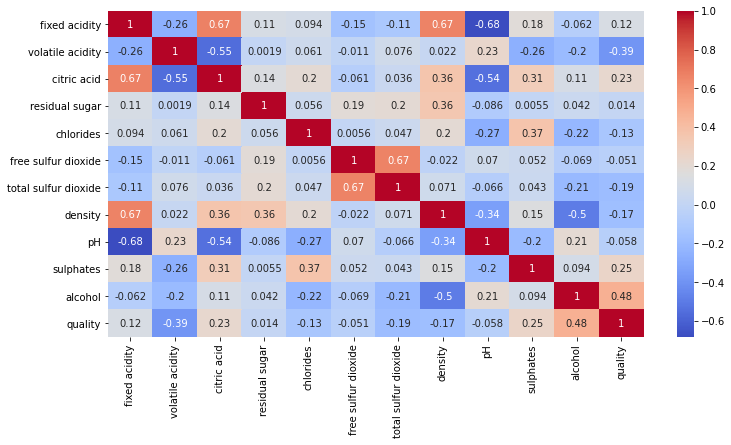

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(wine.corr(),annot=True,cmap='coolwarm')

According to the heatmap, there is a highest correlation between alchohol and quaity

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

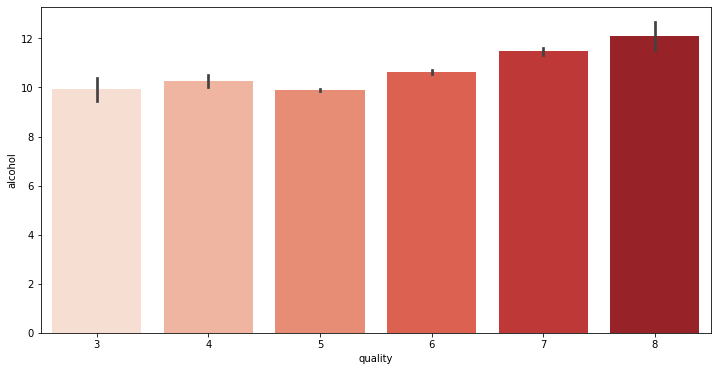

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x=wine["quality"],y=wine["alcohol"],palette="Reds")

<Figure size 864x432 with 0 Axes>

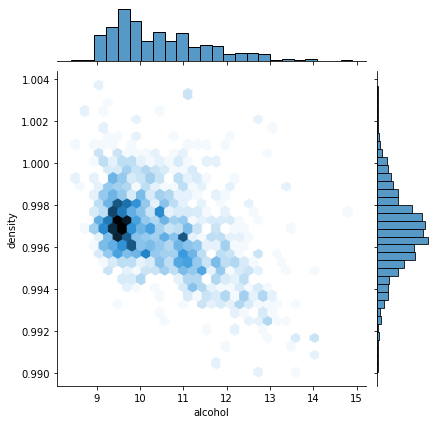

In [36]:
plt.figure(figsize=(12,6))
sns.jointplot(y=wine["density"],x=wine["alcohol"],kind="hex")

In [57]:
X= data.iloc[:,:-1].values
y= data.iloc[:,-1].values

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [42]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
y= labelencoder_y.fit_transform(y)

# Training and Testing Data

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

Scaling data for optimal calculations

In [44]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Support Vector Machine

In [45]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_svc =svc.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.64      0.30      0.41        30
           2       0.89      0.98      0.93       277

    accuracy                           0.88       320
   macro avg       0.51      0.43      0.45       320
weighted avg       0.83      0.88      0.85       320



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.55      0.57      0.56        30
           2       0.91      0.95      0.93       277

    accuracy                           0.88       320
   macro avg       0.49      0.51      0.50       320
weighted avg       0.84      0.88      0.86       320



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Results

In [48]:
conclusion = pd.DataFrame({'models': ["SVC","KNN"],
                           'accuracies': [accuracy_score(y_test,pred_svc),accuracy_score(y_test,pred_knn)]})
conclusion

,models,accuracies
0,SVC,0.878125
1,KNN,0.875000


# SVC is more accurate